In [1]:
import pandas as pd
import numpy as np
import itertools
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline
import tqdm

In [ ]:
# protasov.vp@phystech.edu

In [7]:
data = pd.read_csv('IRIS.csv')

In [36]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
h_1 = data['sepal_length']
h_2 = data['sepal_width']
h_3 = data['petal_length']
h_4 = data['petal_width']

In [39]:
data['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [40]:
# Для первого вида ириса:
s_l1 = data['sepal_length'][:50]
s_w1 = data['sepal_width'][:50]
p_l1 = data['petal_length'][:50]
p_w1 = data['petal_width'][:50]

# Для второго вида ириса:
s_l2 = data['sepal_length'][50:100]
s_w2 = data['sepal_width'][50:100]
p_l2 = data['petal_length'][50:100]
p_w2 = data['petal_width'][50:100]

# Для третьего вида ириса:
s_l3 = data['sepal_length'][100:150]
s_w3 = data['sepal_width'][100:150]
p_l3 = data['petal_length'][100:150]
p_w3 = data['petal_width'][100:150]

### Проверим выборки для каждого вида ириса на нормальность критерием Шапиро-Уилка

H0 - Распределены нормально

H1 - Не нормально

In [72]:
for i in [s_l1,s_l2,s_l3]:
    print('Значения из критерия шапиро-уилка for each sepal_length: T-%s, p-value %s' % (st.shapiro(i)), end = '\n')
print()
for i in [s_w1,s_w2,s_w3]:
    print('Значения из критерия шапиро-уилка for each sepal_width: T-%s, p-value %s' % (st.shapiro(i)), end = '\n')
print()
for i in [p_l1,p_l2,p_l3]:
    print('Значения из критерия шапиро-уилка for each petal_length: T-%s, p-value %s' % (st.shapiro(i)), end = '\n')
print()
for i in [p_w1,p_w2,p_w3]:
    print('Значения из критерия шапиро-уилка for each petal_width: T-%s, p-value %s' % (st.shapiro(i)), end = '\n')

Значения из критерия шапиро-уилка for each sepal_length: T-0.9776989221572876, p-value 0.4595281183719635
Значения из критерия шапиро-уилка for each sepal_length: T-0.9778355956077576, p-value 0.46473264694213867
Значения из критерия шапиро-уилка for each sepal_length: T-0.9711798429489136, p-value 0.25832483172416687

Значения из критерия шапиро-уилка for each sepal_width: T-0.968691885471344, p-value 0.20465604960918427
Значения из критерия шапиро-уилка for each sepal_width: T-0.9741330742835999, p-value 0.33798879384994507
Значения из критерия шапиро-уилка for each sepal_width: T-0.9673910140991211, p-value 0.1809043288230896

Значения из критерия шапиро-уилка for each petal_length: T-0.9549458622932434, p-value 0.05464918911457062
Значения из критерия шапиро-уилка for each petal_length: T-0.9660047888755798, p-value 0.1584833413362503
Значения из критерия шапиро-уилка for each petal_length: T-0.9621862769126892, p-value 0.10977369546890259

Значения из критерия шапиро-уилка for eac

Отсюда можно сделать вывод, что 3 характеристики из 4 можно принять распределенными нормально, а последнюю petal_width, проверим по q-q plot, чтобы понять, если график особо от нормального не отличается, то можно для проверки средних взять критерий Стьюдента, который также работает для выборок, которые не сильно отличаются от нормального.

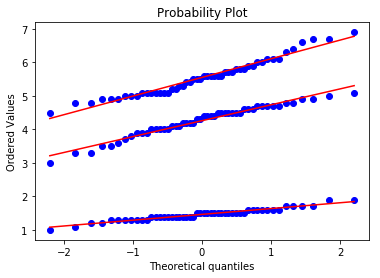

In [87]:
qq_points, qq_line = st.probplot(p_l1, plot=plt)
qq_points, qq_line = st.probplot(p_l2, plot=plt)
qq_points, qq_line = st.probplot(p_l3, plot=plt)

Ложа руку на сердце, чтобы не ущемлять права последней характеристики, также проверим по критерию Стьюдента.

### Применим двухвыборочный критерий Стьюдента для независимых выборок: (попарно применим для 3-х видов)

H0: в среднем каждая из характеристик не различается между разными видами

H1: различается

In [99]:
print('For sepal_length:')
st.ttest_ind(s_l1,s_l2, equal_var=False), st.ttest_ind(s_l1,s_l3, equal_var=False), st.ttest_ind(s_l3,s_l2, equal_var=False)

For sepal_length:


(Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17),
 Ttest_indResult(statistic=-15.386195820079404, pvalue=3.9668672709859296e-25),
 Ttest_indResult(statistic=5.629165259719801, pvalue=1.8661443873771216e-07))

In [95]:
print('For sepal_width:')
st.ttest_ind(s_w1,s_w2, equal_var=False), st.ttest_ind(s_w1,s_w3, equal_var=False), st.ttest_ind(s_w3,s_w2, equal_var=False)

For sepal_width:


(Ttest_indResult(statistic=9.28277255555811, pvalue=5.879601468409086e-15),
 Ttest_indResult(statistic=6.289384996672061, pvalue=9.58603917037916e-09),
 Ttest_indResult(statistic=3.2057607502218186, pvalue=0.001819483482104968))

In [96]:
print('For petal_length:')
st.ttest_ind(p_l1,p_l2, equal_var=False), st.ttest_ind(p_l1,p_l3, equal_var=False), st.ttest_ind(p_l3,p_l2, equal_var=False)

For petal_length:


(Ttest_indResult(statistic=-39.46866259397271, pvalue=1.057210030060334e-45),
 Ttest_indResult(statistic=-49.965703359355636, pvalue=9.713867061697096e-50),
 Ttest_indResult(statistic=12.603779441384987, pvalue=4.900287527398095e-22))

In [97]:
print('For petal_width:')
st.ttest_ind(p_w1,p_w2, equal_var=False), st.ttest_ind(p_w1,p_w3, equal_var=False), st.ttest_ind(p_w3,p_w2, equal_var=False)

For petal_width:


(Ttest_indResult(statistic=-34.01237858829048, pvalue=1.53779680512802e-47),
 Ttest_indResult(statistic=-42.73822967241116, pvalue=1.4667494246530803e-48),
 Ttest_indResult(statistic=14.625367047410148, pvalue=2.111534400988573e-25))

### Отсюда делаем вывод, что с учётом значений  p-value, все характеристики для каждого вида в среднем различаются!

Интервально оценим разность средних для этих выборок:

In [117]:
import numpy as np, statsmodels.stats.api as sms
cm1 = sms.CompareMeans(sms.DescrStatsW(p_l1), sms.DescrStatsW(p_l2))
cm2 = sms.CompareMeans(sms.DescrStatsW(p_l1), sms.DescrStatsW(p_l3))
cm3 = sms.CompareMeans(sms.DescrStatsW(p_l2), sms.DescrStatsW(p_l3))

cm4 = sms.CompareMeans(sms.DescrStatsW(p_w1), sms.DescrStatsW(p_w2))
cm5 = sms.CompareMeans(sms.DescrStatsW(p_w1), sms.DescrStatsW(p_w3))
cm6 = sms.CompareMeans(sms.DescrStatsW(p_w2), sms.DescrStatsW(p_w3))

cm7 = sms.CompareMeans(sms.DescrStatsW(s_l1), sms.DescrStatsW(s_l2))
cm8 = sms.CompareMeans(sms.DescrStatsW(s_l1), sms.DescrStatsW(s_l3))
cm9 = sms.CompareMeans(sms.DescrStatsW(s_l2), sms.DescrStatsW(s_l3))

cm10 = sms.CompareMeans(sms.DescrStatsW(s_w1), sms.DescrStatsW(s_w2))
cm11 = sms.CompareMeans(sms.DescrStatsW(s_w1), sms.DescrStatsW(s_w3))
cm12 = sms.CompareMeans(sms.DescrStatsW(s_w2), sms.DescrStatsW(s_w3))

In [118]:
print('For petal_length:')
print ('confidence interval for p_l1 and p_l2: [%f,%f]' % cm1.tconfint_diff(alpha = 0.05))
print ('confidence interval for p_l1 and p_l3: [%f,%f]' % cm2.tconfint_diff(alpha = 0.05))
print ('confidence interval for p_l2 and p_l3: [%f,%f]' % cm3.tconfint_diff(alpha = 0.05))

For petal_length:
confidence interval for p_l1 and p_l2: [-2.936582,-2.655418]
confidence interval for p_l1 and p_l3: [-4.250361,-3.925639]
confidence interval for p_l2 and p_l3: [-1.495426,-1.088574]


In [119]:
print('For petal_width:')
print ('confidence interval for p_w1 and p_w2: [%f,%f]' % cm4.tconfint_diff(alpha = 0.05))
print ('confidence interval for p_w1 and p_w3: [%f,%f]' % cm5.tconfint_diff(alpha = 0.05))
print ('confidence interval for p_w2 and p_w3: [%f,%f]' % cm6.tconfint_diff(alpha = 0.05))

For petal_width:
confidence interval for p_w1 and p_w2: [-1.145130,-1.018870]
confidence interval for p_w1 and p_w3: [-1.864744,-1.699256]
confidence interval for p_w2 and p_w3: [-0.794981,-0.605019]


In [120]:
print('For sepal_length:')
print ('confidence interval for s_l1 and s_l2: [%f,%f]' % cm7.tconfint_diff(alpha = 0.05))
print ('confidence interval for s_l1 and s_l3: [%f,%f]' % cm8.tconfint_diff(alpha = 0.05))
print ('confidence interval for s_l2 and s_l3: [%f,%f]' % cm9.tconfint_diff(alpha = 0.05))

For sepal_length:
confidence interval for s_l1 and s_l2: [-1.105417,-0.754583]
confidence interval for s_l1 and s_l3: [-1.786042,-1.377958]
confidence interval for s_l2 and s_l3: [-0.881852,-0.422148]


In [121]:
print('For sepal_width:')
print ('confidence interval for s_w1 and s_w2: [%f,%f]' % cm10.tconfint_diff(alpha = 0.05))
print ('confidence interval for s_w1 and s_w3: [%f,%f]' % cm11.tconfint_diff(alpha = 0.05))
print ('confidence interval for s_w2 and s_w3: [%f,%f]' % cm12.tconfint_diff(alpha = 0.05))

For sepal_width:
confidence interval for s_w1 and s_w2: [0.509471,0.786529]
confidence interval for s_w1 and s_w3: [0.303906,0.584094]
confidence interval for s_w2 and s_w3: [-0.330282,-0.077718]


## Вывод: каждая из 4-х характеристик цветка ириса отличается в среднем для 3-х видов цветков и интервал изменения разности средних для каждой характеристики находится выше.